# **Loans Qualification Automation **
Goal  : Create automated tool for loans qualification process by the given data.


# Introduction

Last time most banks systems seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. Development of ML models that can help banks predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not

Link to Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?select=loan-train.csv

# Importing liabries and expolorate the data

In [ ]:
# Imports relevant modules
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp
from numpy import mean

#SKL
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score ,StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import pydot

In [ ]:
def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [ ]:
path = csv_drive_path_generatoer('https://docs.google.com/spreadsheets/d/1MuBSH5EDU1g4LgVFl9peoG8ESOWEr1Ph4UsMZAZ2yt8/edit?usp=sharing')
loans = pd.read_csv('loan-train.csv')
# loans = pd.read_csv(path)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Key Information**

Loan_ID--------------> Unique Loan ID

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loans['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        feature = pd.DataFrame(df[feature_name])
        feature.apply(pd.value_counts).plot.pie(subplots=True)

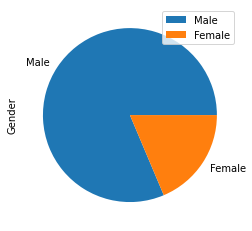

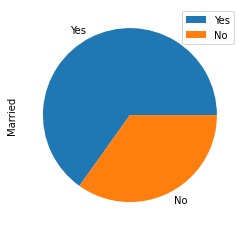

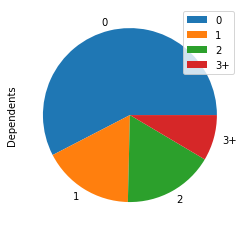

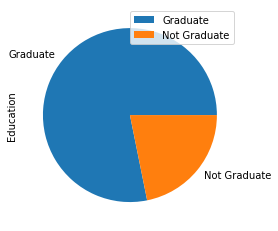

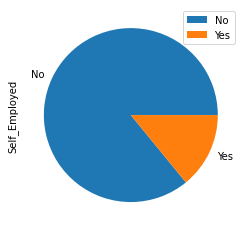

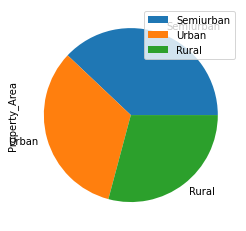

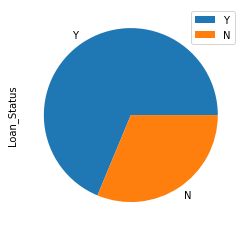

In [ ]:
for featureName in loans.columns[1:]: #ignoring loanId
    explore_object_type(loans, str(featureName))

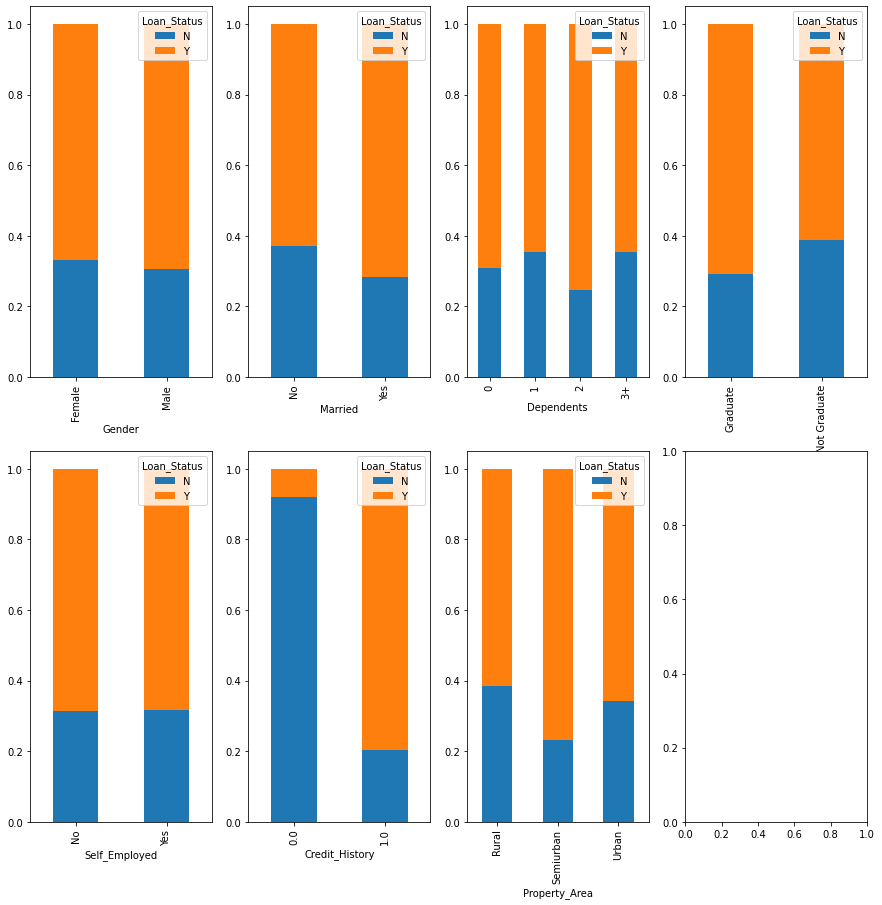

In [ ]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(loans['Gender'],loans['Loan_Status'])
Gender.div(Gender.sum(1).astype(int), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(loans['Married'],loans['Loan_Status'])
Married.div(Married.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(loans['Dependents'],loans['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(loans['Education'],loans['Loan_Status'])
Education.div(Education.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(loans['Self_Employed'],loans['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(loans['Credit_History'],loans['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(loans['Property_Area'],loans['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

In [ ]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preprocessing the data

As we can see here, there are many columns with missing data so we use median,mean and mode to replace with NaN values.

Loan_Status feature boolean values, So we replace Y values with 1 and N values with 0 and same for other Boolean types of columns,"Male": 1, "Female" : 0
After replacing we will use mean amd mode to replace with NaN values.

In [ ]:
loans.Loan_Status = loans.Loan_Status.replace({"Y": 1, "N" : 0})
loans.Gender = loans.Gender.replace({"Male": 1, "Female" : 0})
loans.Married = loans.Married.replace({"Yes": 1, "No" : 0})
loans.Self_Employed = loans.Self_Employed.replace({"Yes": 1, "No" : 0})
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 62.5+ KB


In [ ]:
loans['Gender'].fillna(loans['Gender'].mode()[0.0], inplace=True)
loans['Married'].fillna(loans['Married'].mode()[0.0], inplace=True)
loans['Self_Employed'].fillna(loans['Self_Employed'].mode()[0.0], inplace=True)
loans['Credit_History'].fillna(loans['Credit_History'].mean(), inplace=True)
loans['LoanAmount'].fillna(loans['LoanAmount'].median(), inplace=True)
loans['Loan_Amount_Term'].fillna((loans['Loan_Amount_Term'].median()),inplace=True)


Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loans[col] = le.fit_transform(loans[col])
    

In [ ]:
#change format some columns
loans['Gender']=loans['Gender'].astype(int)
loans['Married']=loans['Married'].astype(int)
loans['Self_Employed']=loans['Self_Employed'].astype(int)
loans['Credit_History']=loans['Credit_History'].astype(int)

Finally, We have all the features with numerical values,and no missing data

In [ ]:
loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
c = loans.groupby(['Property_Area'])['Loan_Status'].value_counts()
d = loans.groupby(['Property_Area'])['Loan_Status'].count()
c/d

Property_Area  Loan_Status
0              1              0.614525
               0              0.385475
1              1              0.768240
               0              0.231760
2              1              0.658416
               0              0.341584
Name: Loan_Status, dtype: float64

**Visualization**

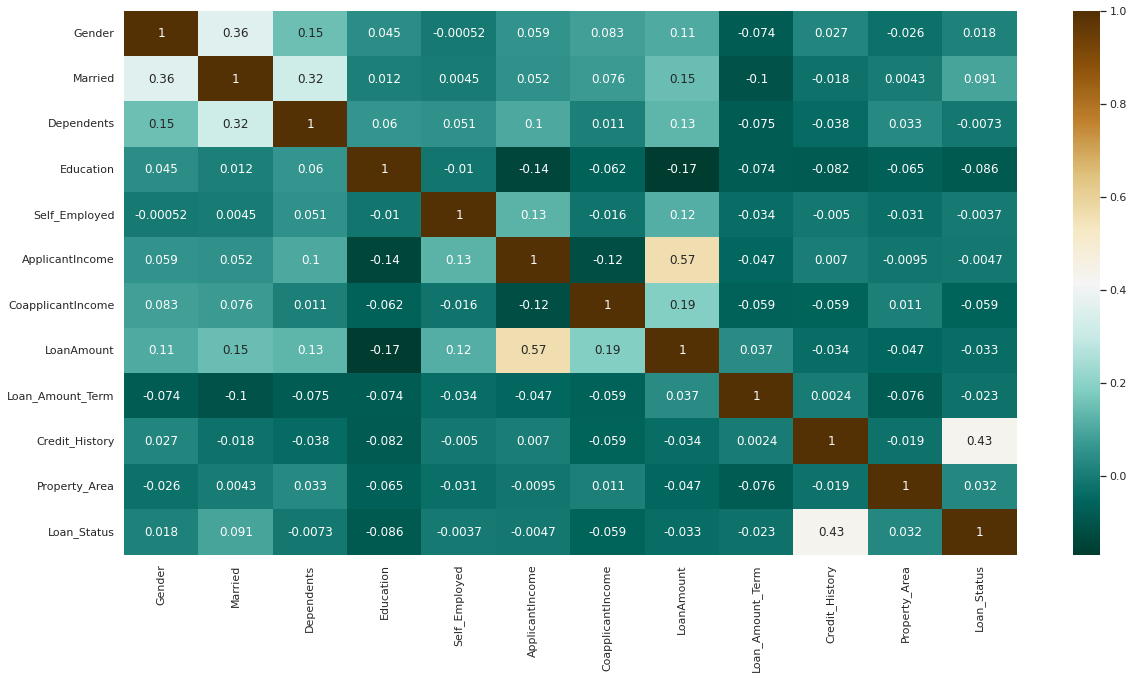

In [ ]:
## **Plot Correlations**
corr_matrix=loans.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

In this heatmap, we can clearly seen the relation between variables (Loan Status and Credit History, Loan Amount and Applicant Income)

In [ ]:
# count_male= len(loans[loans.Gender == 1])
# count_female= len(loans[loans.Gender == 0])

# print('The precentage of male from the data is 'f'{(count_male / len(loans.Gender))*100 :.2f}'"%")
# print('The precentage of female from the data is 'f'{(count_female / len(loans.Gender))*100 :.2f}'"%")


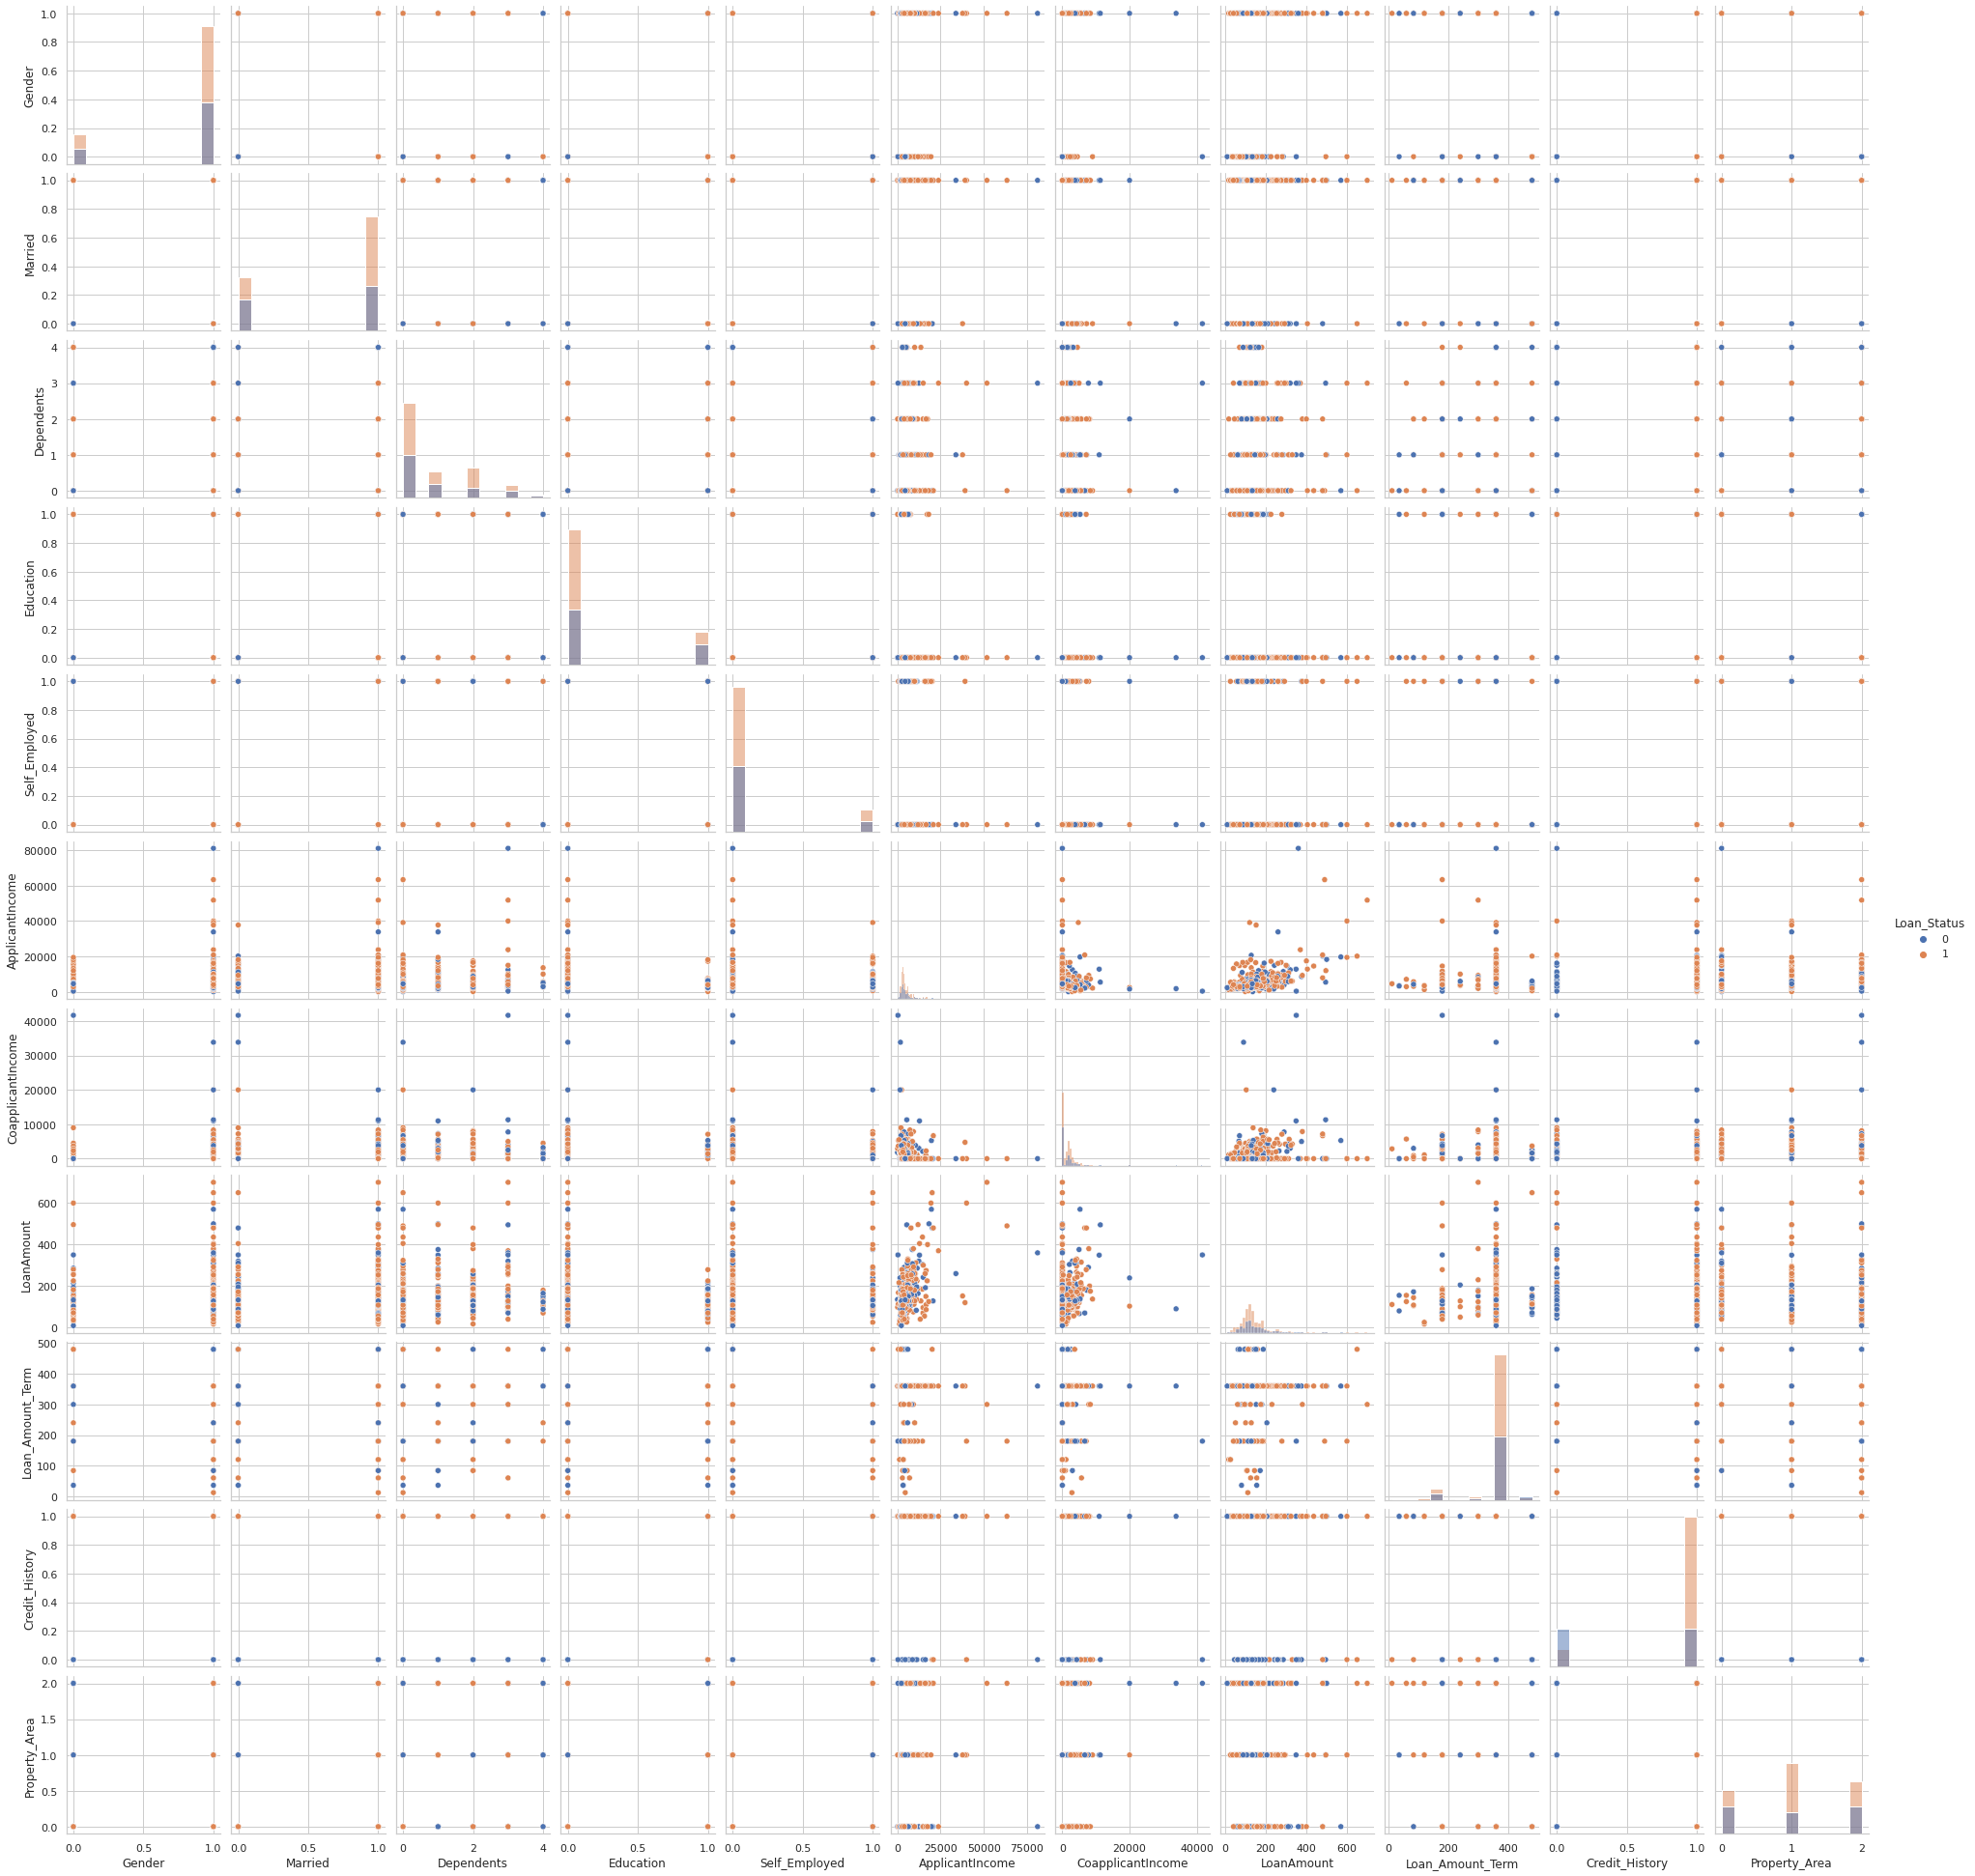

In [ ]:
sns.pairplot(loans, hue="Loan_Status", diag_kind="hist")

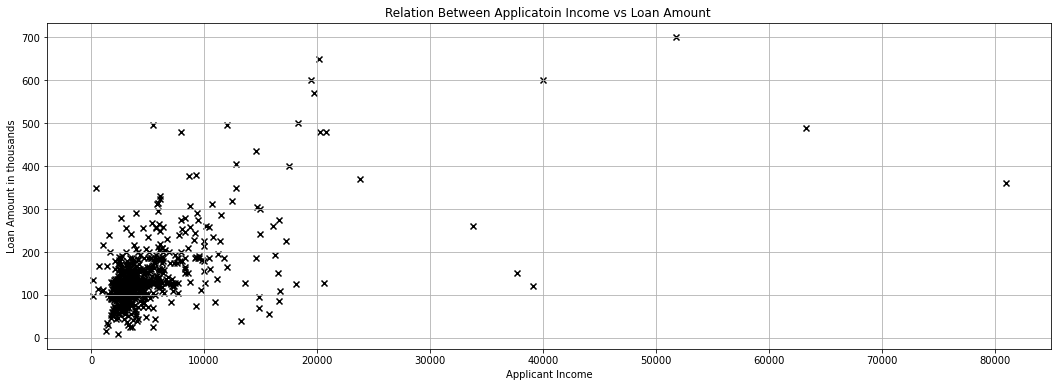

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loans['ApplicantIncome'] , loans['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount in thousands")
plt.show()

Histogram Distribution

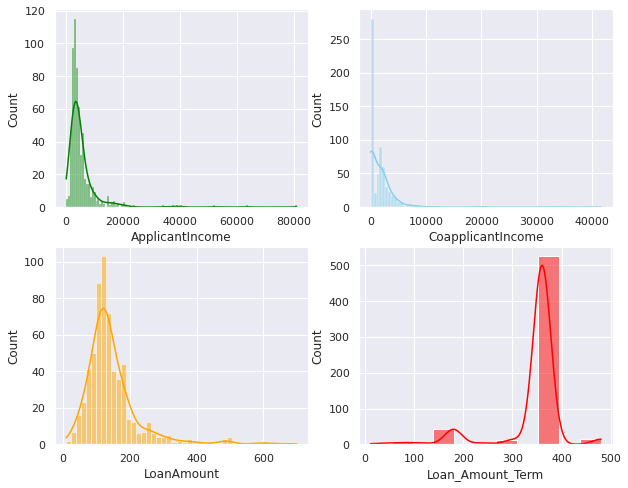

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loans, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loans, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loans, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=loans, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

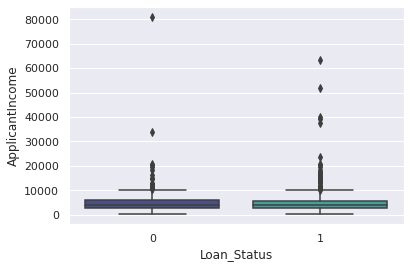

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loans, palette="mako");

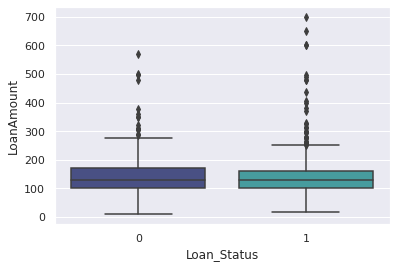

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=loans, palette="mako");

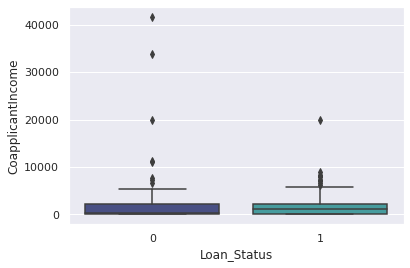

In [ ]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=loans, palette="mako");

Scalling up the data to see if outliners were reduced

In [ ]:
loans_1 = loans.copy(deep=True)
loans_1.ApplicantIncome = np.sqrt(loans_1.ApplicantIncome)
loans_1.CoapplicantIncome = np.sqrt(loans_1.CoapplicantIncome)
loans_1.LoanAmount = np.sqrt(loans_1.LoanAmount)

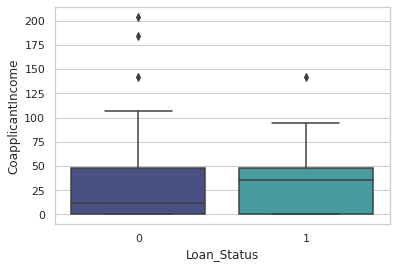

In [ ]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=loans_1, palette="mako");

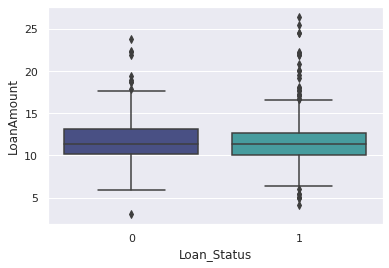

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=loans_1, palette="mako");

# Preparing for models

# **Splitting Features**

In [ ]:
# We don't need the Loan_ID field
loans = loans.drop(columns=['Loan_ID']) 
loans_2 = loans.copy(deep=True)

Target variables-Loan_Status

In [ ]:

X = loans.drop(columns = ['Loan_Status'])
y = loans.Loan_Status 


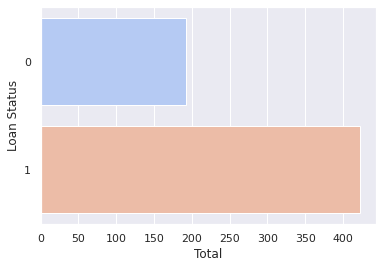

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=loans, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [ ]:
loans_1 = loans_1.drop(columns= ['Loan_ID'])

In [ ]:
X1 = loans_1.drop(columns = ['Loan_Status'])
y1 = loans_1.Loan_Status 

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2


In [ ]:
type(X)

pandas.core.frame.DataFrame

# **Splitting to train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we will run the following models for comparing results: 
1. Gradiant Boosting
2. Ada boosting on Logisitc Regression and Decision Tree
3. Logistic Regression
4. KNN
5. Decision Tree
6. Random Forest

**Gradiant Boosting**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(max_depth = 5, n_estimators = 300, learning_rate = 0.01, random_state = 1234)
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300,
                           random_state=1234)

In [ ]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT Gradient Boosting', 
            accuracy_score(clf_GB.predict(X_train), y_train), 
            accuracy_score(clf_GB.predict(X_test), y_test)))

DT Gradient Boosting classifier:
     	train accuracy: 0.90
     	test accuracy: 0.76


In [ ]:
print("{:3} classifier:\n \
    \ttrain recall: {:.2f}\n \
    \ttest recall: {:.2f}"\
    .format('DT Gradient Boosting', 
            recall_score(clf_GB.predict(X_train), y_train), 
            recall_score(clf_GB.predict(X_test), y_test)))

DT Gradient Boosting classifier:
     	train recall: 0.88
     	test recall: 0.77


In [ ]:
print("{:3} classifier:\n \
    \ttrain precision: {:.2f}\n \
    \ttest precision: {:.2f}"\
    .format('DT Gradient Boosting', 
            precision_score(clf_GB.predict(X_train), y_train), 
            precision_score(clf_GB.predict(X_test), y_test)))

DT Gradient Boosting classifier:
     	train precision: 1.00
     	test precision: 0.90


In [ ]:
#Running with the balanced data in Boosting classifier

# print("{:3} classifier:\n \
#     \ttrain accuracy: {:.2f}\n \
#     \ttest accuracy: {:.2f}"\
#     .format('DT Gradient Boosting', 
#             accuracy_score(clf_GB.predict(X_over), y_over), 
#             accuracy_score(clf_GB.predict(X_overtest), y_overtest)))

 **Ada Boosting**

In [ ]:
loans_log = LogisticRegression(max_iter=1000)
loans_dt =  DecisionTreeClassifier( max_depth=5,class_weight='balanced')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_log = AdaBoostClassifier(base_estimator = loans_log, n_estimators = 300, learning_rate = 1e-03, random_state = 1234)
ada_boost_log.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000),
                   learning_rate=0.001, n_estimators=300, random_state=1234)

In [ ]:
print(f"LR ADA boosting classifier:\n \
    \ttrain accuracy: {accuracy_score(ada_boost_log.predict(X_train), y_train):.2f}\n \
    \ttest accuracy: {accuracy_score(ada_boost_log.predict(X_test), y_test):.2f}")

LR ADA boosting classifier:
     	train accuracy: 0.71
     	test accuracy: 0.65


In [ ]:
ada_boost_dt = AdaBoostClassifier(base_estimator = loans_dt, n_estimators = 300, learning_rate = 1e-03, random_state = 1234)
ada_boost_dt.fit(X_train, y_train)
print(f"DT ADA boosting classifier:\n \
    \ttrain accuracy: {accuracy_score(ada_boost_dt.predict(X_train), y_train):.2f}\n \
    \ttest accuracy: {accuracy_score(ada_boost_dt.predict(X_test), y_test):.2f}")

DT ADA boosting classifier:
     	train accuracy: 0.88
     	test accuracy: 0.67



**LogisticRegression**

In [ ]:
logistic_model = LogisticRegression(max_iter=1000,random_state=123456)

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=123456)

In [ ]:
cm = confusion_matrix(y_true=y,
                      y_pred=logistic_model.predict(X))
pd.DataFrame(cm, 
             index=logistic_model.classes_, 
             columns=logistic_model.classes_)

,0,1
0,84,108
1,33,389


In [ ]:
print('LR calssification report for train:\n',classification_report(y_true=y_train,
                            y_pred=logistic_model.predict(X_train)))
print('------------------------------------------------------')
print('LR calssification report for test:\n',classification_report(y_true=y_test,
                            y_pred=logistic_model.predict(X_test)))

LR calssification report for train:
               precision    recall  f1-score   support

           0       0.66      0.38      0.48       120
           1       0.78      0.92      0.84       291

    accuracy                           0.76       411
   macro avg       0.72      0.65      0.66       411
weighted avg       0.75      0.76      0.74       411

------------------------------------------------------
LR calssification report for test:
               precision    recall  f1-score   support

           0       0.81      0.53      0.64        72
           1       0.78      0.93      0.85       131

    accuracy                           0.79       203
   macro avg       0.80      0.73      0.74       203
weighted avg       0.79      0.79      0.78       203



In [ ]:
logistic_model.predict_proba(X)

array([[0.23208734, 0.76791266],
       [0.18964359, 0.81035641],
       [0.13473325, 0.86526675],
       ...,
       [0.1620157 , 0.8379843 ],
       [0.18378967, 0.81621033],
       [0.57667395, 0.42332605]])

In [ ]:
#Running LR with the balanced data and comparing results:
# loans_clf = LogisticRegression().fit(X_over, y_over)
# print(classification_report(y_true=y_over,
#                             y_pred=logistic_model.predict(X_over)))

In [ ]:
# #Changing the train to he oversampled data for the models
# X_train= pd.DataFrame(X_over, columns=X_train.columns) 
# y_train= pd.Series(y_over)

In [ ]:
# score = logistic_model.score(X_train, y_train)
# print("accuracy_score logistic_model :{:.2f}%".format(score*100))


accuracy_score logistic_model :73.20%


**KNN-KNeighborsClassifier**

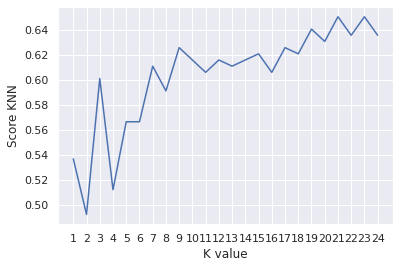

KNN best accuracy: 65.02%


In [ ]:
score_knn = []
for i in range(1,25):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    score_knn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,25), score_knn)
plt.xticks(np.arange(1,25,1))
plt.xlabel("K value")
plt.ylabel("Score KNN")
plt.show()
KNN_best = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNN_best*100))


In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors = 21)
KNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

**DecisionTreeClassifier Model**

In [ ]:
dt_tree = DecisionTreeClassifier( max_depth=5,class_weight='balanced').fit(X_train, y_train)
# feat_importance = dt_tree.tree_.compute_feature_importances(normalize=False)
pd.Series(dt_tree.feature_importances_,
          index=X_train.columns)

Gender               0.016633
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.089687
CoapplicantIncome    0.175939
LoanAmount           0.098443
Loan_Amount_Term     0.083649
Credit_History       0.417389
Property_Area        0.118260
dtype: float64

In [ ]:
# loans = loans.drop(['Married','Dependents','Education','Self_Employed','Gender'], axis=1)

In [ ]:
# X = loans.drop(['Loan_Status'], axis=1)
# y = loans.Loan_Status
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X.head()

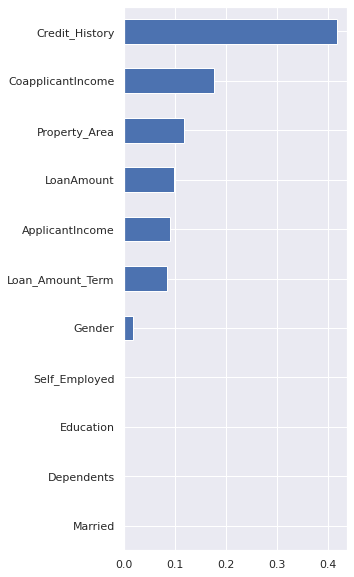

In [ ]:
pd.Series(dt_tree.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(4, 10), rot=0)

In [ ]:
y_pred = dt_tree.predict(X_train)

In [ ]:
dt_tree = DecisionTreeClassifier( max_depth=5,class_weight='balanced').fit(X_train, y_train)
print('DT calssification report for train:',classification_report(y_true=y_train,
                            y_pred=dt_tree.predict(X_train)))
print('-----------------------------------------------------')
print('DT calssification report for test:',classification_report(y_true=y_test,
                            y_pred=dt_tree.predict(X_test)))

DT calssification report for train:               precision    recall  f1-score   support

           0       0.66      0.68      0.67       120
           1       0.87      0.86      0.86       291

    accuracy                           0.81       411
   macro avg       0.76      0.77      0.77       411
weighted avg       0.81      0.81      0.81       411

-----------------------------------------------------
DT calssification report for test:               precision    recall  f1-score   support

           0       0.64      0.60      0.62        72
           1       0.79      0.82      0.80       131

    accuracy                           0.74       203
   macro avg       0.71      0.71      0.71       203
weighted avg       0.74      0.74      0.74       203



In [ ]:
y_pred = (dt_tree.predict_proba(X_train)[:,1] >= 0.3).astype(bool)

In [ ]:
dt_tree.predict_proba(X)

array([[0.26672777, 0.73327223],
       [0.44700461, 0.55299539],
       [0.7080292 , 0.2919708 ],
       ...,
       [0.24433249, 0.75566751],
       [0.26672777, 0.73327223],
       [0.68309859, 0.31690141]])

**Random Forest**

Finding the randomforest with the best results based on the number of trees and the depth 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = np.arange(10,100,10)
depth = np.arange(2,10,2)
for e in estimator:
  for d in depth:
    loans_rf = RandomForestClassifier(n_estimators=e,max_depth=d).fit(X_train,y_train)
    print(f'RF calssification report with {e} trees and {d} depth for train:\n',classification_report(y_true=y_train,
                                y_pred=loans_rf.predict(X_train)))
    print('-------------------------------------------------------')
    print(f'RF calssification report with {e} trees and {d} dept for test:\n',classification_report(y_true=y_test,
                                y_pred=loans_rf.predict(X_test)))

RF calssification report with 10 trees and 2 depth for train:
               precision    recall  f1-score   support

           0       0.80      0.03      0.06       120
           1       0.71      1.00      0.83       291

    accuracy                           0.72       411
   macro avg       0.76      0.51      0.45       411
weighted avg       0.74      0.72      0.61       411

-------------------------------------------------------
RF calssification report with 10 trees and 2 dept for test:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.64      0.99      0.78       131

    accuracy                           0.64       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.64      0.50       203

RF calssification report with 10 trees and 4 depth for train:
               precision    recall  f1-score   support

           0       0.86      0.35      0.50     

In [ ]:
random_forest = RandomForestClassifier().fit(X_train,y_train)
estimator = np.arange(10,100,10)
depth = np.arange(2,10,2)
for e in estimator:
  for d in depth:
    res = []
    loans_rf = RandomForestClassifier(n_estimators=e,max_depth=d).fit(X_train,y_train)
    acc = accuracy_score(y_true=y_train, y_pred=loans_rf.predict(X_train))
    pre = precision_score(y_true=y_train, y_pred=loans_rf.predict(X_train))
    rec = recall_score(y_true=y_train, y_pred=loans_rf.predict(X_train))


# **Setting Threshold**

In [ ]:
th = np.arange(0.1,0.9,0.1)
for t in th:
  print(f'The threshold is: {t} \n',classification_report(y_true=y_test,
                              y_pred = (dt_tree.predict_proba(X_test)[:,1] >= t).astype(bool)))

The threshold is: 0.1 
               precision    recall  f1-score   support

           0       0.50      0.01      0.03        72
           1       0.65      0.99      0.78       131

    accuracy                           0.65       203
   macro avg       0.57      0.50      0.41       203
weighted avg       0.59      0.65      0.51       203

The threshold is: 0.2 
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        72
           1       0.75      0.88      0.81       131

    accuracy                           0.73       203
   macro avg       0.71      0.67      0.68       203
weighted avg       0.72      0.73      0.71       203

The threshold is: 0.30000000000000004 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54        72
           1       0.74      0.82      0.78       131

    accuracy                           0.70       203
   macro avg       0.67      0.66      0

In [ ]:
th = np.arange(0.1,0.9,0.1)
for t in th:
  print(f'The threshold is {t}:\n',classification_report(y_true=y_train,
                              y_pred=(logistic_model.predict_proba(X_train)[:,1] >= 0.5).astype(bool)))

The threshold is 0.1:
               precision    recall  f1-score   support

           0       0.66      0.38      0.48       120
           1       0.78      0.92      0.84       291

    accuracy                           0.76       411
   macro avg       0.72      0.65      0.66       411
weighted avg       0.75      0.76      0.74       411

The threshold is 0.2:
               precision    recall  f1-score   support

           0       0.66      0.38      0.48       120
           1       0.78      0.92      0.84       291

    accuracy                           0.76       411
   macro avg       0.72      0.65      0.66       411
weighted avg       0.75      0.76      0.74       411

The threshold is 0.30000000000000004:
               precision    recall  f1-score   support

           0       0.66      0.38      0.48       120
           1       0.78      0.92      0.84       291

    accuracy                           0.76       411
   macro avg       0.72      0.65      0.66

**After comparing threshold levels, the default threshold (0.5) has the highest score.**

# **Comparing the models**

Running the models with:
1. Clean  
2. Noramlized data
3. Balanced target
4. important features

# **Clean (regular) data**

In [ ]:
Xr = loans.drop(columns = ['Loan_Status'])
yr = loans.Loan_Status 

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.33, random_state=42)

In [ ]:
#GradientBoostingClassifier
clf_GB_r = GradientBoostingClassifier(max_depth = 5, n_estimators = 300, learning_rate = 0.01, random_state = 1234)
clf_GB_r.fit(Xr_train, yr_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300,
                           random_state=1234)

In [ ]:
test_score_gb = round(accuracy_score(yr_test, clf_GB_r.predict(Xr_test)) * 100,3)
train_score_gb = round(accuracy_score(yr_train, clf_GB_r.predict(Xr_train)) * 100,3)
test_score_pr_gb = round(precision_score(yr_test, clf_GB_r.predict(Xr_test)) * 100,3)
train_score_pr_gb = round(precision_score(yr_train, clf_GB_r.predict(Xr_train)) * 100,3)
test_score_re_gb = round(recall_score(yr_test, clf_GB_r.predict(Xr_test)) * 100,3)
train_score_re_gb = round(recall_score(yr_train, clf_GB_r.predict(Xr_train)) * 100,3)

In [ ]:
#ada_boost
ada_boost_log.fit(Xr_train, yr_train)
logistic_model.fit(Xr_train, yr_train)
ada_boost_dt = AdaBoostClassifier(base_estimator = loans_dt, n_estimators = 300, learning_rate = 1e-03, random_state = 1234)
ada_boost_dt.fit(Xr_train, yr_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=5),
                   learning_rate=0.001, n_estimators=300, random_state=1234)

In [ ]:
test_score_ada = round(accuracy_score(yr_test, ada_boost_dt.predict(Xr_test)) * 100,3)
train_score_ada = round(accuracy_score(yr_train, ada_boost_dt.predict(Xr_train)) * 100,3)
test_score_pr_ada = round(precision_score(yr_test, ada_boost_dt.predict(Xr_test)) * 100,3)
train_score_pr_ada = round(precision_score(yr_train, ada_boost_dt.predict(Xr_train)) * 100,3)
test_score_re_ada = round(recall_score(yr_test, ada_boost_dt.predict(Xr_test)) * 100,3)
train_score_re_ada = round(recall_score(yr_train, ada_boost_dt.predict(Xr_train)) * 100,3)

In [ ]:
#DecisionTreeClassifier
dt_tree = DecisionTreeClassifier( max_depth=5,class_weight='balanced').fit(Xr_train, yr_train)

In [ ]:
test_score_dt = round(accuracy_score(yr_test, dt_tree.predict(Xr_test)) * 100,3)
train_score_dt = round(accuracy_score(yr_train, dt_tree.predict(Xr_train)) * 100,3)
test_score_pr_dt = round(precision_score(yr_test, dt_tree.predict(Xr_test)) * 100,3)
train_score_pr_dt = round(precision_score(yr_train, dt_tree.predict(Xr_train)) * 100)
test_score_re_dt = round(recall_score(yr_test, dt_tree.predict(Xr_test)) * 100,3)
train_score_re_dt = round(recall_score(yr_train, dt_tree.predict(Xr_train)) * 100,3)

In [ ]:
#RandomForestClassifier
random_forest = RandomForestClassifier().fit(Xr_train,yr_train)


In [ ]:
test_score_rf = round(accuracy_score(yr_test, random_forest.predict(Xr_test)) * 100,3)
train_score_rf = round(accuracy_score(yr_train, random_forest.predict(Xr_train)) * 100,3)
test_score_pr_rf = round(precision_score(yr_test, random_forest.predict(Xr_test)) * 100,3)
train_score_pr_rf = round(precision_score(yr_train, random_forest.predict(Xr_train)) * 100,3)
test_score_re_rf = round(recall_score(yr_test, random_forest.predict(Xr_test)) * 100,3)
train_score_re_rf = round(recall_score(yr_train, random_forest.predict(Xr_train)) * 100,3)

In [ ]:
#LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,random_state=123456)
logistic_model.fit(Xr_train, yr_train)

LogisticRegression(max_iter=1000, random_state=123456)

In [ ]:
test_score_lr = round(accuracy_score(yr_test, logistic_model.predict(Xr_test)) * 100,3)
train_score_lr = round(accuracy_score(yr_train, logistic_model.predict(Xr_train)) * 100,3)
test_score_pr_lr = round(precision_score(yr_test, logistic_model.predict(Xr_test)) * 100,3)
train_score_pr_lr = round(precision_score(yr_train, logistic_model.predict(Xr_train)) * 100,3)
test_score_re_lr = round(recall_score(yr_test, logistic_model.predict(Xr_test)) * 100,3)
train_score_re_lr = round(recall_score(yr_train, logistic_model.predict(Xr_train)) * 100,3)

In [ ]:
#KNclassifier
KNclassifier.fit(Xr_train, yr_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
test_score_kn = round(accuracy_score(yr_test, KNclassifier.predict(Xr_test)) * 100,3)
train_score_kn = round(accuracy_score(yr_train, KNclassifier.predict(Xr_train)) * 100,3)
test_score_pr_kn = round(precision_score(yr_test, KNclassifier.predict(Xr_test)) * 100,3)
train_score_pr_kn = round(precision_score(yr_train, KNclassifier.predict(Xr_train)) * 100,3)
test_score_re_kn = round(recall_score(yr_test, KNclassifier.predict(Xr_test)) * 100,3)
train_score_re_kn = round(recall_score(yr_train, KNclassifier.predict(Xr_train)) * 100,3)



In [ ]:

reults_gb = pd.DataFrame(data=[["Gradiant Boosting", train_score_gb,test_score_gb,train_score_pr_gb,test_score_pr_gb,train_score_re_gb,test_score_re_gb]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_ada = pd.DataFrame(data=[["ADA Boosting", train_score_ada, test_score_ada,train_score_pr_ada,test_score_pr_ada,train_score_re_ada,test_score_re_ada]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

reults_dt = pd.DataFrame(data=[["Decision Tree", train_score_dt,test_score_dt,train_score_pr_dt,test_score_pr_dt,train_score_re_dt,test_score_re_dt]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_rf = pd.DataFrame(data=[["RandomForest", train_score_rf, test_score_rf,train_score_pr_rf,test_score_pr_rf,train_score_re_rf,test_score_re_rf]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

restults_lr = pd.DataFrame(data=[["Logistic Regression", train_score_lr, test_score_lr,train_score_pr_lr,test_score_pr_lr,train_score_re_lr,test_score_re_lr]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
results_knn = pd.DataFrame(data=[["KNN", train_score_kn, test_score_kn,train_score_pr_kn,test_score_pr_kn,train_score_re_kn,test_score_re_kn]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

a = restults_lr.append([results_knn,restults_rf,reults_dt,reults_gb,restults_ada], ignore_index=True)
a

,Model,Training Accuracy %,Testing Accuracy %,Training precision %,Testing precision %,Training recall %,Testing recall %
0,Logistic Regression,76.156,78.818,78.299,78.205,91.753,93.130
1,KNN,71.290,65.025,72.123,65.625,96.907,96.183
2,RandomForest,100.000,69.458,100.000,71.429,100.000,87.786
3,Decision Tree,80.535,73.892,87.000,78.676,85.567,81.679
4,Gradiant Boosting,90.268,75.862,88.146,76.623,99.656,90.076
5,ADA Boosting,87.835,66.502,92.281,72.340,90.378,77.863


# **Normalize the data**

In [ ]:
loans = pd.read_csv('loan-train.csv')

In [ ]:
loans.Loan_Status = loans.Loan_Status.replace({"Y": 1, "N" : 0})
loans.Gender = loans.Gender.replace({"Male": 1, "Female" : 0})
loans.Married = loans.Married.replace({"Yes": 1, "No" : 0})
loans.Self_Employed = loans.Self_Employed.replace({"Yes": 1, "No" : 0})


In [ ]:
loans['Gender'].fillna(loans['Gender'].mode()[0.0], inplace=True)
loans['Married'].fillna(loans['Married'].mode()[0.0], inplace=True)
loans['Self_Employed'].fillna(loans['Self_Employed'].mode()[0.0], inplace=True)
loans['Credit_History'].fillna(loans['Credit_History'].mean(), inplace=True)
loans['LoanAmount'].fillna(loans['LoanAmount'].median(), inplace=True)
loans['Loan_Amount_Term'].fillna((loans['Loan_Amount_Term'].median()),inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loans[col] = le.fit_transform(loans[col])
    

In [ ]:
#change format some columns
loans['Gender']=loans['Gender'].astype(int)
loans['Married']=loans['Married'].astype(int)
loans['Self_Employed']=loans['Self_Employed'].astype(int)
loans['Credit_History']=loans['Credit_History'].astype(int)

In [ ]:

loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [ ]:
loans =  loans.drop(columns= ['Loan_ID'])
X = loans.drop(columns = ['Loan_Status'])
y = loans.Loan_Status 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
loans_norm = loans.copy(deep=True)
Xn = loans_norm.drop(columns = ['Loan_Status'], axis=1)
yn = loans_norm.Loan_Status
Xn = MinMaxScaler().fit_transform(Xn)

In [ ]:
from pandas.core.frame import DataFrame
Xn =  DataFrame(data = Xn)

Xn

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.00,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.33, random_state=42)


In [ ]:
loans_n =  DecisionTreeClassifier( max_depth=5,class_weight='balanced')

In [ ]:
clf_GB_n = GradientBoostingClassifier(max_depth = 5, n_estimators = 300, learning_rate = 0.01, random_state = 1234)
dt_tree_n = DecisionTreeClassifier( max_depth=5,class_weight='balanced')
ada_boost_n = AdaBoostClassifier(base_estimator = loans_n, n_estimators = 300, learning_rate = 1e-03, random_state = 1234)

In [ ]:
gb_norm = clf_GB_n.fit(Xn_train, yn_train)
ada_norm = ada_boost_n.fit(Xn_train, yn_train)
dt_norm = dt_tree_n.fit(Xn_train, yn_train)
rf_n = random_forest.fit(Xn_train, yn_train)
lr_n = logistic_model.fit(Xn_train, yn_train)
knn_n = KNclassifier.fit(Xn_train, yn_train)


In [ ]:
test_score_gb_n = round(accuracy_score(yn_test, gb_norm.predict(Xn_test)) * 100,3)
train_score_gb_n = round(accuracy_score(yn_train, gb_norm.predict(Xn_train)) * 100,3)
test_score_pr_gb_n = round(precision_score(yn_test, gb_norm.predict(Xn_test)) * 100,3)
train_score_pr_gb_n = round(precision_score(yn_train, gb_norm.predict(Xn_train)) * 100,3)
test_score_re_gb_n = round(recall_score(yn_test, gb_norm.predict(Xn_test)) * 100,3)
train_score_re_gb_n = round(recall_score(yn_train, gb_norm.predict(Xn_train)) * 100,3)

In [ ]:
test_score_ada_n = round(accuracy_score(yn_test, ada_norm.predict(Xn_test)) * 100,3)
train_score_ada_n = round(accuracy_score(yn_train, ada_norm.predict(Xn_train)) * 100,3)
test_score_pr_ada_n = round(precision_score(yn_test, ada_norm.predict(Xn_test)) * 100,3)
train_score_pr_ada_n = round(precision_score(yn_train, ada_norm.predict(Xn_train)) * 100,3)
test_score_re_ada_n = round(recall_score(yn_test, ada_norm.predict(Xn_test)) * 100,3)
train_score_re_ada_n = round(recall_score(yn_train, ada_norm.predict(Xn_train)) * 100,3)

In [ ]:
test_score_dt_n = round(accuracy_score(yn_test, dt_norm.predict(Xn_test)) * 100,3)
train_score_dt_n = round(accuracy_score(yn_train, dt_norm.predict(Xn_train)) * 100,3)
test_score_pr_dt_n = round(precision_score(yn_test, dt_norm.predict(Xn_test)) * 100,3)
train_score_pr_dt_n = round(precision_score(yn_train, dt_norm.predict(Xn_train)) * 100,3)
test_score_re_dt_n = round(recall_score(yn_test, dt_norm.predict(Xn_test)) * 100,3)
train_score_re_dt_n = round(recall_score(yn_train, dt_norm.predict(Xn_train)) * 100,3)

In [ ]:
test_score_rf_n = round(accuracy_score(yn_test, rf_n.predict(Xn_test)) * 100,3)
train_score_rf_n = round(accuracy_score(yn_train, rf_n.predict(Xn_train)) * 100,3)
test_score_pr_rf_n = round(precision_score(yn_test, rf_n.predict(Xn_test)) * 100,3)
train_score_pr_rf_n = round(precision_score(yn_train, rf_n.predict(Xn_train)) * 100,3)
test_score_re_rf_n = round(recall_score(yn_test, rf_n.predict(Xn_test)) * 100,3)
train_score_re_rf_n = round(recall_score(yn_train, rf_n.predict(Xn_train)) * 100,3)

In [ ]:
test_score_lr_n = round(accuracy_score(yn_test, logistic_model.predict(Xn_test)) * 100,3)
train_score_lr_n = round(accuracy_score(yn_train, logistic_model.predict(Xn_train)) * 100,3)
test_score_pr_lr_n = round(precision_score(yn_test, logistic_model.predict(Xn_test)) * 100,3)
train_score_pr_lr_n = round(precision_score(yn_train, logistic_model.predict(Xn_train)) * 100,3)
test_score_re_lr_n = round(recall_score(yn_test, logistic_model.predict(Xn_test)) * 100,3)
train_score_re_lr_n = round(recall_score(yn_train, logistic_model.predict(Xn_train)) * 100,3)

In [ ]:
test_score_kn_n = round(accuracy_score(yn_test, KNclassifier.predict(Xn_test)) * 100,3)
train_score_kn_n = round(accuracy_score(yn_train, KNclassifier.predict(Xn_train)) * 100,3)
test_score_pr_kn_n = round(precision_score(yn_test, KNclassifier.predict(Xn_test)) * 100,3)
train_score_pr_kn_n = round(precision_score(yn_train, KNclassifier.predict(Xn_train)) * 100,3)
test_score_re_kn_n = round(recall_score(yn_test, KNclassifier.predict(Xn_test)) * 100,3)
train_score_re_kn_n = round(recall_score(yn_train, KNclassifier.predict(Xn_train)) * 100,3)



In [ ]:

reults_gb_n = pd.DataFrame(data=[["Gradiant Boosting - Norm", train_score_gb_n,test_score_gb_n,train_score_pr_gb_n,test_score_pr_gb_n,train_score_re_gb_n,test_score_re_gb_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_ada_n = pd.DataFrame(data=[["ADA Boosting- Norm", train_score_ada_n, test_score_ada_n,train_score_pr_ada_n,test_score_pr_ada_n,train_score_re_ada_n,test_score_re_ada_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

reults_dt_n = pd.DataFrame(data=[["Decision Tree- Norm", train_score_dt_n,test_score_dt_n,train_score_pr_dt_n,test_score_pr_dt_n,train_score_re_dt_n,test_score_re_dt_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_rf_n = pd.DataFrame(data=[["RandomForest- Norm", train_score_rf_n, test_score_rf_n,train_score_pr_rf_n,test_score_pr_rf_n,train_score_re_rf_n,test_score_re_rf_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

restults_lr_n = pd.DataFrame(data=[["Logistic Regression - Norm", train_score_lr_n, test_score_lr_n,train_score_pr_lr_n,test_score_pr_lr_n,train_score_re_lr_n,test_score_re_lr_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
results_knn_n = pd.DataFrame(data=[["KNN - Norm", train_score_kn_n, test_score_kn_n,train_score_pr_kn_n,test_score_pr_kn_n,train_score_re_kn_n,test_score_re_kn_n]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

b = restults_lr_n.append([results_knn_n,restults_rf_n,reults_dt_n,reults_gb_n,restults_ada_n], ignore_index=True)
b

,Model,Training Accuracy %,Testing Accuracy %,Training precision %,Testing precision %,Training recall %,Testing recall %
0,Logistic Regression - Norm,77.129,76.847,79.758,77.632,90.722,90.076
1,KNN - Norm,76.156,73.892,77.493,74.074,93.471,91.603
2,RandomForest- Norm,100.000,68.473,100.000,71.338,100.000,85.496
3,Decision Tree- Norm,80.535,73.892,86.760,78.676,85.567,81.679
4,Gradiant Boosting - Norm,90.268,75.862,88.146,76.623,99.656,90.076
5,ADA Boosting- Norm,87.835,66.502,92.281,72.340,90.378,77.863


# **Oversampling by SMOTE** (only for trained data)

In [ ]:
from collections import Counter
print(f"Before over under sampeling : counter = {Counter(y_train)}")

# Preparing strategy
oversample = SMOTE()

## Over sampling 
X_over, y_over = oversample.fit_resample(X_train, y_train)
print(f"after under sampeling:  counter = {Counter(y_over)}")

Before over under sampeling : counter = Counter({1: 291, 0: 120})
after under sampeling:  counter = Counter({1: 291, 0: 291})


In [ ]:
X_overtest, y_overtest = oversample.fit_resample(X_test, y_test)

In [ ]:
gb_over = clf_GB.fit(X_over, y_over)
ada_over = ada_boost_dt.fit(X_over, y_over)
dt_over = dt_tree.fit(X_over, y_over)
rf_over = random_forest.fit(X_over, y_over)
lr_over = logistic_model.fit(X_over, y_over)
knn_over = KNclassifier.fit(X_over, y_over)


In [ ]:
test_score_gb_o = round(accuracy_score(y_overtest, gb_over.predict(X_overtest)) * 100,3)
train_score_gb_o = round(accuracy_score(y_over, gb_over.predict(X_over)) * 100,3)
test_score_pr_gb_o = round(precision_score(y_overtest, gb_over.predict(X_overtest)) * 100,3)
train_score_pr_gb_o = round(precision_score(y_over, gb_over.predict(X_over)) * 100,3)
test_score_re_gb_o = round(recall_score(y_overtest, gb_over.predict(X_overtest)) * 100,3)
train_score_re_gb_o = round(recall_score(y_over, gb_over.predict(X_over)) * 100,3)

In [ ]:
test_score_ada_o = round(accuracy_score(y_overtest, ada_over.predict(X_overtest)) * 100,3)
train_score_ada_o = round(accuracy_score(y_over, ada_over.predict(X_over)) * 100,3)
test_score_pr_ada_o = round(precision_score(y_overtest, ada_over.predict(X_overtest)) * 100,3)
train_score_pr_ada_o = round(precision_score(y_over, ada_over.predict(X_over)) * 100,3)
test_score_re_ada_o = round(recall_score(y_overtest, ada_over.predict(X_overtest)) * 100,3)
train_score_re_ada_o = round(recall_score(y_over, ada_over.predict(X_over)) * 100,3)

In [ ]:
test_score_dt_o = round(accuracy_score(y_overtest, dt_over.predict(X_overtest)) * 100,3)
train_score_dt_o = round(accuracy_score(y_over, dt_over.predict(X_over)) * 100,3)
test_score_pr_dt_o = round(precision_score(y_overtest, dt_over.predict(X_overtest)) * 100,3)
train_score_pr_dt_o = round(precision_score(y_over, dt_over.predict(X_over)) * 100,3)
test_score_re_dt_o = round(recall_score(y_overtest, dt_over.predict(X_overtest)) * 100,3)
train_score_re_dt_o = round(recall_score(y_over, dt_over.predict(X_over)) * 100,3)

In [ ]:
test_score_rf_o = round(accuracy_score(y_overtest, rf_over.predict(X_overtest)) * 100,3)
train_score_rf_o = round(accuracy_score(y_over, rf_over.predict(X_over)) * 100,3)
test_score_pr_rf_o = round(precision_score(y_overtest, rf_over.predict(X_overtest)) * 100,3)
train_score_pr_rf_o = round(precision_score(y_over, rf_over.predict(X_over)) * 100,3)
test_score_re_rf_o = round(recall_score(y_overtest, rf_over.predict(X_overtest)) * 100,3)
train_score_re_rf_o = round(recall_score(y_over, rf_over.predict(X_over)) * 100,3)

In [ ]:
test_score_lr_o = round(accuracy_score(y_overtest, lr_over.predict(X_overtest)) * 100,3)
train_score_lr_o = round(accuracy_score(y_over, lr_over.predict(X_over)) * 100,3)
test_score_pr_lr_o = round(precision_score(y_overtest, lr_over.predict(X_overtest)) * 100,3)
train_score_pr_lr_o = round(precision_score(y_over, lr_over.predict(X_over)) * 100,3)
test_score_re_lr_o = round(recall_score(y_overtest, lr_over.predict(X_overtest)) * 100,3)
train_score_re_lr_o = round(recall_score(y_over, lr_over.predict(X_over)) * 100,3)

In [ ]:
test_score_kn_o = round(accuracy_score(y_overtest, knn_over.predict(X_overtest)) * 100,3)
train_score_kn_o = round(accuracy_score(y_over, knn_over.predict(X_over)) * 100,3)
test_score_pr_kn_o = round(precision_score(y_overtest, knn_over.predict(X_overtest)) * 100,3)
train_score_pr_kn_o = round(precision_score(y_over, knn_over.predict(X_over)) * 100,3)
test_score_re_kn_o = round(recall_score(y_overtest, knn_over.predict(X_overtest)) * 100,3)
train_score_re_kn_o = round(recall_score(y_over, knn_over.predict(X_over)) * 100,3)



In [ ]:
reults_gb_o = pd.DataFrame(data=[["Gradiant Boosting - SMOTE", train_score_gb_o,test_score_gb_o,train_score_pr_gb_o,test_score_pr_gb_o,train_score_re_gb_o,test_score_re_gb_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_ada_o = pd.DataFrame(data=[["ADA Boosting- SMOTE", train_score_ada_o, test_score_ada_o,train_score_pr_ada_o,test_score_pr_ada_o,train_score_re_ada_o,test_score_re_ada_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

reults_dt_o = pd.DataFrame(data=[["Decision Tree- SMOTE", train_score_dt_o,test_score_dt_o,train_score_pr_dt_o,test_score_pr_dt_o,train_score_re_dt_o,test_score_re_dt_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_rf_o = pd.DataFrame(data=[["RandomForest- SMOTE", train_score_rf_o, test_score_rf_o,train_score_pr_rf_o,test_score_pr_rf_o,train_score_re_rf_o,test_score_re_rf_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

restults_lr_o = pd.DataFrame(data=[["Logistic Regression - SMOTE", train_score_lr_o, test_score_lr_o,train_score_pr_lr_o,test_score_pr_lr_o,train_score_re_lr_o,test_score_re_lr_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
results_knn_o = pd.DataFrame(data=[["KNN - SMOTE", train_score_kn_o, test_score_kn_o,train_score_pr_kn_o,test_score_pr_kn_o,train_score_re_kn_o,test_score_re_kn_o]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

c = restults_lr_o.append([results_knn_o,restults_rf_o,reults_dt_o,reults_gb_o,restults_ada_o], ignore_index=True)
c

,Model,Training Accuracy %,Testing Accuracy %,Training precision %,Testing precision %,Training recall %,Testing recall %
0,Logistic Regression - SMOTE,76.632,80.916,71.233,77.181,89.347,87.786
1,KNN - SMOTE,60.825,48.473,59.813,48.667,65.979,55.725
2,RandomForest- SMOTE,100.000,75.954,100.000,73.944,100.000,80.153
3,Decision Tree- SMOTE,79.897,79.771,75.893,77.083,87.629,84.733
4,Gradiant Boosting - SMOTE,92.955,75.954,89.809,72.667,96.907,83.206
5,ADA Boosting- SMOTE,93.643,71.756,89.198,68.153,99.313,81.679


# **Important Features**

In [ ]:
#Keeping only important features according to importnat featrures arrbitude 
Xf= loans.drop(columns = ['Loan_Status','Married','Dependents','Education','Self_Employed','Gender'])
yf = loans.Loan_Status 

In [ ]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.33, random_state=42)

In [ ]:
gb_f = clf_GB.fit(Xf_train, yf_train)
ada_f = ada_boost_dt.fit(Xf_train, yf_train)
dt_f = dt_tree.fit(Xf_train, yf_train)
rf_f = random_forest.fit(Xf_train, yf_train)
lr_f = logistic_model.fit(Xf_train, yf_train)
knn_f = KNclassifier.fit(Xf_train, yf_train)


In [ ]:
test_score_gb_f = round(accuracy_score(yf_test, gb_f.predict(Xf_test)) * 100,3)
train_score_gb_f = round(accuracy_score(yf_train, gb_f.predict(Xf_train)) * 100,3)
test_score_pr_gb_f = round(precision_score(yf_test, gb_f.predict(Xf_test)) * 100,3)
train_score_pr_gb_f = round(precision_score(yf_train, gb_f.predict(Xf_train)) * 100,3)
test_score_re_gb_f = round(recall_score(yf_test, gb_f.predict(Xf_test)) * 100,3)
train_score_re_gb_f = round(recall_score(yf_train, gb_f.predict(Xf_train)) * 100,3)

In [ ]:
test_score_ada_f = round(accuracy_score(yf_test, ada_f.predict(Xf_test)) * 100,3)
train_score_ada_f = round(accuracy_score(yf_train, ada_f.predict(Xf_train)) * 100,3)
test_score_pr_ada_f = round(precision_score(yf_test, ada_f.predict(Xf_test)) * 100,3)
train_score_pr_ada_f = round(precision_score(yf_train, ada_f.predict(Xf_train)) * 100,3)
test_score_re_ada_f = round(recall_score(yf_test, ada_f.predict(Xf_test)) * 100,3)
train_score_re_ada_f = round(recall_score(yf_train, ada_f.predict(Xf_train)) * 100,3)

In [ ]:
test_score_dt_f = round(accuracy_score(yf_test, dt_f.predict(Xf_test)) * 100,3)
train_score_dt_f = round(accuracy_score(yf_train, dt_f.predict(Xf_train)) * 100,3)
test_score_pr_dt_f = round(precision_score(yf_test, dt_f.predict(Xf_test)) * 100,3)
train_score_pr_dt_f = round(precision_score(yf_train, dt_f.predict(Xf_train)) * 100,3)
test_score_re_dt_f = round(recall_score(yf_test, dt_f.predict(Xf_test)) * 100,3)
train_score_re_dt_f = round(recall_score(yf_train, dt_f.predict(Xf_train)) * 100,3)

In [ ]:
test_score_rf_f = round(accuracy_score(yf_test, rf_f.predict(Xf_test)) * 100,3)
train_score_rf_f = round(accuracy_score(yf_train, rf_f.predict(Xf_train)) * 100,3)
test_score_pr_rf_f = round(precision_score(yf_test, rf_f.predict(Xf_test)) * 100,3)
train_score_pr_rf_f = round(precision_score(yf_train, rf_f.predict(Xf_train)) * 100,3)
test_score_re_rf_f = round(recall_score(yf_test, rf_f.predict(Xf_test)) * 100,3)
train_score_re_rf_f = round(recall_score(yf_train, rf_f.predict(Xf_train)) * 100,3)

In [ ]:
test_score_lr_f = round(accuracy_score(yf_test, lr_f.predict(Xf_test)) * 100,3)
train_score_lr_f = round(accuracy_score(yf_train, lr_f.predict(Xf_train)) * 100,3)
test_score_pr_lr_f = round(precision_score(yf_test, lr_f.predict(Xf_test)) * 100,3)
train_score_pr_lr_f = round(precision_score(yf_train, lr_f.predict(Xf_train)) * 100,3)
test_score_re_lr_f = round(recall_score(yf_test, lr_f.predict(Xf_test)) * 100,3)
train_score_re_lr_f = round(recall_score(yf_train, lr_f.predict(Xf_train)) * 100,3)

In [ ]:
test_score_kn_f = round(accuracy_score(yf_test, knn_f.predict(Xf_test)) * 100,3)
train_score_kn_f = round(accuracy_score(yf_train, knn_f.predict(Xf_train)) * 100,3)
test_score_pr_kn_f = round(precision_score(yf_test, knn_f.predict(Xf_test)) * 100,3)
train_score_pr_kn_f = round(precision_score(yf_train, knn_f.predict(Xf_train)) * 100,3)
test_score_re_kn_f = round(recall_score(yf_test, knn_f.predict(Xf_test)) * 100,3)
train_score_re_kn_f = round(recall_score(yf_train, knn_f.predict(Xf_train)) * 100,3)



In [ ]:
reults_gb_f = pd.DataFrame(data=[["Gradiant Boosting - Features", train_score_gb_f,test_score_gb_f,train_score_pr_gb_f,test_score_pr_gb_f,train_score_re_gb_f,test_score_re_gb_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_ada_f = pd.DataFrame(data=[["ADA Boosting- Features", train_score_ada_f, test_score_ada_f,train_score_pr_ada_f,test_score_pr_ada_f,train_score_re_ada_f,test_score_re_ada_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

reults_dt_f = pd.DataFrame(data=[["Decision Tree- Features", train_score_dt_f,test_score_dt_f,train_score_pr_dt_f,test_score_pr_dt_f,train_score_re_dt_f,test_score_re_dt_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_rf_f = pd.DataFrame(data=[["RandomForest- Features", train_score_rf_f, test_score_rf_f,train_score_pr_rf_f,test_score_pr_rf_f,train_score_re_rf_f,test_score_re_rf_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

restults_lr_f = pd.DataFrame(data=[["Logistic Regression - Features", train_score_lr_f, test_score_lr_f,train_score_pr_lr_f,test_score_pr_lr_f,train_score_re_lr_f,test_score_re_lr_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
results_knn_f = pd.DataFrame(data=[["KNN - Features", train_score_kn_f, test_score_kn_f,train_score_pr_kn_f,test_score_pr_kn_f,train_score_re_kn_f,test_score_re_kn_f]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

d = restults_lr_f.append([results_knn_f,restults_rf_f,reults_dt_f,reults_gb_f,restults_ada_f], ignore_index=True)
d

,Model,Training Accuracy %,Testing Accuracy %,Training precision %,Testing precision %,Training recall %,Testing recall %
0,Logistic Regression - Features,75.669,77.833,78.006,76.875,91.409,93.893
1,KNN - Features,71.290,65.025,72.123,65.625,96.907,96.183
2,RandomForest- Features,100.000,69.458,100.000,72.258,100.000,85.496
3,Decision Tree- Features,80.779,73.892,86.806,78.676,85.911,81.679
4,Gradiant Boosting - Features,88.078,69.458,86.667,71.166,98.282,88.550
5,ADA Boosting- Features,85.888,62.562,92.364,69.784,87.285,74.046


In [ ]:
# from collections import Counter
Xm= loans.drop(columns = ['Loan_Status','Married','Dependents','Education','Self_Employed','Gender'])
ym = loans.Loan_Status 
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.33, random_state=42)
## Over sampling 
Xm_train, ym_train = oversample.fit_resample(X_train, y_train)
print(f"after under sampeling:  counter = {Counter(y_over)}")

after under sampeling:  counter = Counter({1: 291, 0: 291})


In [ ]:
Xm_test, ym_test = oversample.fit_resample(X_test, y_test)

In [ ]:
Xm.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,5849,0.0,128.0,360.0,1,2
1,4583,1508.0,128.0,360.0,1,0
2,3000,0.0,66.0,360.0,1,2
3,2583,2358.0,120.0,360.0,1,2
4,6000,0.0,141.0,360.0,1,2


In [ ]:
gb_m = clf_GB.fit(Xm_train, ym_train)
ada_m = ada_boost_dt.fit(Xm_train, ym_train)
dt_m = dt_tree.fit(Xm_train, ym_train)
rf_m = random_forest.fit(Xm_train, ym_train)
lr_m = logistic_model.fit(Xm_train, ym_train)
knn_m = KNclassifier.fit(Xm_train, ym_train)


In [ ]:
test_score_gb_m = round(accuracy_score(ym_test, gb_m.predict(Xm_test)) * 100,3)
train_score_gb_m = round(accuracy_score(y_over, gb_m.predict(Xm_train)) * 100,3)
test_score_pr_gb_m = round(precision_score(ym_test, gb_m.predict(Xm_test)) * 100,3)
train_score_pr_gb_m = round(precision_score(y_over, gb_m.predict(Xm_train)) * 100,3)
test_score_re_gb_m = round(recall_score(ym_test, gb_m.predict(Xm_test)) * 100,3)
train_score_re_gb_m = round(recall_score(y_over, gb_m.predict(Xm_train)) * 100,3)

In [ ]:
test_score_ada_m = round(accuracy_score(ym_test, ada_m.predict(Xm_test)) * 100,3)
train_score_ada_m = round(accuracy_score(y_over, ada_m.predict(Xm_train)) * 100,3)
test_score_pr_ada_m = round(precision_score(ym_test, ada_m.predict(Xm_test)) * 100,3)
train_score_pr_ada_m = round(precision_score(y_over, ada_m.predict(Xm_train)) * 100,3)
test_score_re_ada_m = round(recall_score(ym_test, ada_m.predict(Xm_test)) * 100,3)
train_score_re_ada_m = round(recall_score(y_over, ada_m.predict(Xm_train)) * 100,3)

In [ ]:
test_score_dt_m = round(accuracy_score(ym_test, dt_m.predict(Xm_test)) * 100,3)
train_score_dt_m = round(accuracy_score(y_over, dt_m.predict(Xm_train)) * 100,3)
test_score_pr_dt_m = round(precision_score(ym_test, dt_m.predict(Xm_test)) * 100,3)
train_score_pr_dt_m = round(precision_score(y_over, dt_m.predict(Xm_train)) * 100,3)
test_score_re_dt_m = round(recall_score(ym_test, dt_m.predict(Xm_test)) * 100,3)
train_score_re_dt_m = round(recall_score(y_over, dt_m.predict(Xm_train)) * 100,3)

In [ ]:
test_score_rf_m = round(accuracy_score(ym_test, rf_m.predict(Xm_test)) * 100,3)
train_score_rf_m = round(accuracy_score(y_over, rf_m.predict(Xm_train)) * 100,3)
test_score_pr_rf_m = round(precision_score(ym_test, rf_m.predict(Xm_test)) * 100,3)
train_score_pr_rf_m = round(precision_score(y_over, rf_m.predict(Xm_train)) * 100,3)
test_score_re_rf_m = round(recall_score(ym_test, rf_m.predict(Xm_test)) * 100,3)
train_score_re_rf_m = round(recall_score(y_over, rf_m.predict(Xm_train)) * 100,3)

In [ ]:
test_score_lr_m = round(accuracy_score(ym_test, lr_m.predict(Xm_test)) * 100,3)
train_score_lr_m = round(accuracy_score(y_over, lr_m.predict(Xm_train)) * 100,3)
test_score_pr_lr_m = round(precision_score(ym_test, lr_m.predict(Xm_test)) * 100,3)
train_score_pr_lr_m = round(precision_score(y_over, lr_m.predict(Xm_train)) * 100,3)
test_score_re_lr_m = round(recall_score(ym_test, lr_m.predict(Xm_test)) * 100,3)
train_score_re_lr_m = round(recall_score(y_over, lr_m.predict(Xm_train)) * 100,3)

In [ ]:
test_score_kn_m = round(accuracy_score(ym_test, knn_m.predict(Xm_test)) * 100,3)
train_score_kn_m = round(accuracy_score(y_over, knn_m.predict(Xm_train)) * 100,3)
test_score_pr_kn_m = round(precision_score(ym_test, knn_m.predict(Xm_test)) * 100,3)
train_score_pr_kn_m = round(precision_score(y_over, knn_m.predict(Xm_train)) * 100,3)
test_score_re_kn_m = round(recall_score(ym_test, knn_m.predict(Xm_test)) * 100,3)
train_score_re_kn_m = round(recall_score(y_over, knn_m.predict(Xm_train)) * 100,3)



In [ ]:
reults_gb_m = pd.DataFrame(data=[["Gradiant Boosting - BC+Fe", train_score_gb_m,test_score_gb_m,train_score_pr_gb_m,test_score_pr_gb_m,train_score_re_gb_m,test_score_re_gb_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_ada_m = pd.DataFrame(data=[["ADA Boosting- BC+Fe", train_score_ada_m, test_score_ada_m,train_score_pr_ada_m,test_score_pr_ada_m,train_score_re_ada_m,test_score_re_ada_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

reults_dt_m = pd.DataFrame(data=[["Decision Tree- BC+Fe", train_score_dt_m,test_score_dt_m,train_score_pr_dt_m,test_score_pr_dt_m,train_score_re_dt_m,test_score_re_dt_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
restults_rf_m = pd.DataFrame(data=[["RandomForest- BC+Fe", train_score_rf_m, test_score_rf_m,train_score_pr_rf_m,test_score_pr_rf_m,train_score_re_rf_m,test_score_re_rf_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

restults_lr_m = pd.DataFrame(data=[["Logistic Regression - BC+Fe", train_score_lr_m, test_score_lr_m,train_score_pr_lr_m,test_score_pr_lr_m,train_score_re_lr_m,test_score_re_lr_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])
results_knn_m = pd.DataFrame(data=[["KNN - BC+Fe", train_score_kn_m, test_score_kn_m,train_score_pr_kn_m,test_score_pr_kn_m,train_score_re_kn_m,test_score_re_kn_m]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','Training precision %','Testing precision %','Training recall %','Testing recall %'])

c = restults_lr_m.append([results_knn_m,restults_rf_m,reults_dt_m,reults_gb_m,restults_ada_m], ignore_index=True)
c

,Model,Training Accuracy %,Testing Accuracy %,Training precision %,Testing precision %,Training recall %,Testing recall %
0,Logistic Regression - BC+Fe,75.258,79.008,71.810,78.358,83.162,80.153
1,KNN - BC+Fe,62.715,50.000,62.171,50.000,64.948,58.779
2,RandomForest- BC+Fe,100.000,75.954,100.000,73.944,100.000,80.153
3,Decision Tree- BC+Fe,81.443,78.244,76.369,74.342,91.065,86.260
4,Gradiant Boosting - BC+Fe,92.955,79.389,91.118,76.923,95.189,83.969
5,ADA Boosting- BC+Fe,87.629,74.809,82.301,70.701,95.876,84.733


In [ ]:
lrprob_X = round(logistic_model.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %'

In [ ]:
lr_pro = pd.DataFrame(data=[["Logistic Regression Prob", round(logistic_model.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %',round(logistic_model.predict_proba(X_train)[:][0][1]*100,2).astype(str) + ' %', round(logistic_model.predict_proba(X_test)[:][0][1]*100,2).astype(str) + ' %']],
                      columns= ['Model','Probablity for X', 'Probablity for X_train', 'Probabilty for X_test'])
dt_pro = pd.DataFrame(data=[["Decision Tree Prob", round(dt_tree.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %',round(dt_tree.predict_proba(X_train)[:][0][1]*100,2).astype(str) + ' %', round(dt_tree.predict_proba(X_test)[:][0][1]*100,2).astype(str) + ' %']],
                      columns= ['Model','Probablity for X', 'Probablity for X_train', 'Probabilty for X_test'])
rf_pro = pd.DataFrame(data=[["Random Forest Prob", round(random_forest.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %',round(random_forest.predict_proba(X_train)[:][0][1]*100,2).astype(str) + ' %', round(random_forest.predict_proba(X_test)[:][0][1]*100,2).astype(str) + ' %']],
                      columns= ['Model','Probablity for X', 'Probablity for X_train', 'Probabilty for X_test'])
ada_pro = pd.DataFrame(data=[["ADA Boost Prob", round(ada_boost_dt.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %',round(ada_boost_dt.predict_proba(X_train)[:][0][1]*100,2).astype(str) + ' %', round(ada_boost_dt.predict_proba(X_test)[:][0][1]*100,2).astype(str) + ' %']],
                      columns= ['Model','Probablity for X', 'Probablity for X_train', 'Probabilty for X_test'])
gb_prb = pd.DataFrame(data=[["Gradiant Boost Prob", round(clf_GB.predict_proba(X)[:][0][1]*100,2).astype(str) + ' %',round(clf_GB.predict_proba(X_train)[:][0][1]*100,2).astype(str) + ' %', round(clf_GB.predict_proba(X_test)[:][0][1]*100,2).astype(str) + ' %']],
                      columns= ['Model','Probablity for X', 'Probablity for X_train', 'Probabilty for X_test'])
prob_table = lr_pro.append([dt_pro,rf_pro,ada_pro,gb_prb],ignore_index = True)
prob_table

,Model,Probablity for X,Probablity for X_train,Probabilty for X_test
0,Logistic Regression Prob,69.54 %,75.7 %,81.55 %
1,Decision Tree Prob,62.26 %,96.35 %,66.2 %
2,Random Forest Prob,87.0 %,95.0 %,81.0 %
3,ADA Boost Prob,68.07 %,94.17 %,65.66 %
4,Gradiant Boost Prob,82.15 %,91.56 %,79.76 %


In [ ]:
logistic_model.predict_proba(X)[]

# **roc-auc scoring**

In [ ]:
from sklearn import metrics

In [ ]:
dt_param_grid = {'max_depth': [3, 7, 12], 'min_samples_leaf': [5, 15, 40],'min_samples_split': [3, 5, 10]}

In [ ]:
grid_dt_auc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='roc_auc', cv=10)

grid_dt_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 7, 12],
                         'min_samples_leaf': [5, 15, 40],
                         'min_samples_split': [3, 5, 10]},
             scoring='roc_auc')

In [ ]:
#for precision
grid_dt_precision = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='precision', cv=10)

grid_dt_precision.fit(X_train, y_train)

df_results_train = pd.DataFrame(grid_dt_precision.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

In [ ]:
#for recall
grid_dt_recall = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='recall', cv=10)

grid_dt_recall.fit(X_train, y_train)

df_results_train = pd.DataFrame(grid_dt_recall.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

In [ ]:
#for accuracy
grid_dt_accuracy = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, scoring='accuracy', cv=10)

grid_dt_accuracy.fit(X_train, y_train)

df_results_train = pd.DataFrame(grid_dt_accuracy.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

In [ ]:
#for train
print("Best precision parameters: {}".format(grid_dt_precision.best_params_))
print("Best precision score is {:.3f}".format(grid_dt_precision.best_score_))

print("Best recall parameters: {}".format(grid_dt_recall.best_params_))
print("Best recall score is {:.3f}".format(grid_dt_recall.best_score_))

print("Best accuracy parameters: {}".format(grid_dt_accuracy.best_params_))
print("Best accuracy score is {:.3f}".format(grid_dt_accuracy.best_score_))



Best precision parameters: {'max_depth': 3, 'min_samples_leaf': 40, 'min_samples_split': 3}
Best precision score is 0.799
Best recall parameters: {'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 3}
Best recall score is 0.897
Best accuracy parameters: {'max_depth': 3, 'min_samples_leaf': 40, 'min_samples_split': 3}
Best accuracy score is 0.764


In [ ]:
# now we train the tree again on the whole train set with the best params from the grid search
dt = DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

In [ ]:
y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)


print("Train roc-auc:{:.2f}%".format( roc_auc_score(y_train,y_train_pred)*100))
print("Test roc-auc:{:.2f}%".format( roc_auc_score(y_test,y_pred)*100))

Train roc-auc:84.18%
Test roc-auc:61.95%


In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.51      0.51        72
           1       0.73      0.73      0.73       131

    accuracy                           0.65       203
   macro avg       0.62      0.62      0.62       203
weighted avg       0.65      0.65      0.65       203



In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred=dt.predict(X_test)

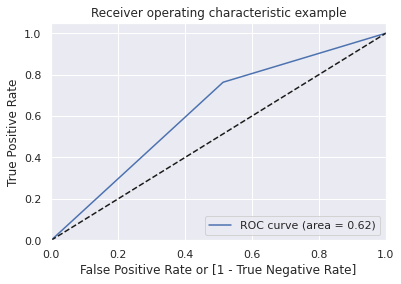

(array([0.        , 0.51388889, 1.        ]),
 array([0.        , 0.76335878, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test,pred)

**ROC summarizes the predictive power for all possible values of p > 0.5.Higher the area under curve, better the prediction power of the model.**

In [ ]:
numerical_cols = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History	']
categorical_cols = ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']

In [ ]:
# categorical_transformer = Pipeline(steps=
#                                     [('imputer', SimpleImputer(strategy='most_frequent')),
#                                      ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# continuous_transformer = Pipeline(steps=
#                                   [('imputer', SimpleImputer(strategy='median')),
#                                     ('scaler', StandardScaler())])

# boll_transformer = Pipeline(steps=
#                             [('imputer', SimpleImputer(strategy='most_frequent'))]
#                             )

# preprocessor = ColumnTransformer(transformers=
#                                   [('num', continuous_transformer, numerical_cols),
#                                    ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# # Define params for each classifier type
# grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
#                     'clf__C': [0.001],
#                     'clf__solver': ['liblinear']}]

# grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
#                     'clf__C': [0.5, 1.5]}]

# grid_params_dt = [{'clf__max_depth': [30,20],
#                    'clf__min_samples_leaf': [10,3]}]

# grid_params_rf = [{'clf__max_depth': [30,20],
#                    'clf__min_samples_leaf': [10,3]}]                   

# cls_params = [(LogisticRegression(), grid_params_lr),
#               (SVC(), grid_params_svm),
#               (DecisionTreeClassifier(), grid_params_dt),
#                (RandomForestClassifier(), grid_params_rf)]
# for classifier, grid_params in cls_params:
#     pipeline = Pipeline(steps=
#                         [('preprocess', preprocessor),
#                           ('clf', classifier)])
#     model = model.fit(X_train, y_train)

#     y_test_pred, y_train_pred = model.predict(X_test), model.predict(X_train)
#     print("accuracy = ", (y_test_pred == y_test).sum()/len(y_test))

# **Grid search**

# Grid search based on Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
import time

In [ ]:
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsLR.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR.best_params_)
#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))

0.7639372822299652
{'logisticregression__C': 0.5}
Test accuracy: 0.768


In [ ]:
# logistic_model = LogisticRegression(max_iter=1000,random_state=123456)
gb_gs = clf_GB.fit(X_train, y_train)
ada_gs = ada_boost_dt.fit(X_train, y_train)
dt_gs = dt_tree.fit(X_train, y_train)
rf_gs = random_forest.fit(X_train, y_train)
lr_gs = logistic_model.fit(X_train, y_train)
knn_gs = KNclassifier.fit(X_train, y_train)

In [ ]:
my_scoring=['accuracy','precision','recall']

In [ ]:
parameters_lr = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
parameters_dt = {
     'max_depth': [10,20,30,40,50,60,70,80,90],
     'min_samples_leaf': [1,3,5,7,9],
     'min_samples_split': [2,4,6,8,10]
}
parameters_rf = {
    'max_depth': [10,20,30,40,50,60,70,80,90],
    'n_estimators': [20,40,60,80,100],
    'min_samples_leaf': [1,3,5,7,9]
}
neig = list(range(1,31))
parameters_knn = {
    'n_neighbors': neig
}
est = list(range(10,200,20))
dept = list(range(10,100,10))
parameters_ada = {
    'base_estimator__max_depth': dept,
    'n_estimators': est
}
parameters_gb ={
    'max_depth': dept,
    'n_estimators': est
}


In [ ]:
models_params = {
    dt_gs:parameters_dt,
    lr_gs:parameters_lr,
    knn_gs:parameters_knn,
    gb_gs : parameters_gb,
    ada_gs:parameters_ada,
    rf_gs:parameters_rf
    }
params = [parameters_dt,parameters_lr, parameters_knn]
for m,p in models_params.items():
  start = time.time()
  clf_gs = GridSearchCV(m, 
                    param_grid = p,
                    scoring = 'accuracy',
                    cv = 10)
  gs_l=clf_gs.fit(X_train, y_train)
  print(f"\n ----- model = {m}, ----- \n")
  print("train = ", clf_gs.score(X_train, y_train))
  print("test = ", clf_gs.score(X_test, y_test))
  print("best model = \n", clf_gs.best_estimator_.get_params())
  print("time = ",time.time() - start)


 ----- model = DecisionTreeClassifier(class_weight='balanced', max_depth=5), ----- 

train =  0.8029197080291971
test =  0.6748768472906403
best model = 
 {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
time =  13.048602104187012

 ----- model = LogisticRegression(max_iter=1000, random_state=123456), ----- 

train =  0.7712895377128953
test =  0.7684729064039408
best model = 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 123456, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
time =  10.87357759475708

 ----- model = KNeighborsClassifier(n_neighbors=21), ----- 

train =  0.7

In [ ]:
# train_score_gs_l = round(accuracy_score(y_train, gs_l.predict(X_train)) * 100,3)
# test_score_gs_l = round(accuracy_score(y_test, gs_l.predict(X_test)) * 100,3)
# train_score_gs_l_pr = round(precision_score(y_train, gs_l.predict(X_train)) * 100,3)
# test_score_gs_l_pr = round(precision_score(y_test, gs_l.predict(X_test)) * 100,3)
# train_score_gs_l_re = round(recall_score(y_train, gs_l.predict(X_train)) * 100,3)
# test_score_gs_l_re = round(recall_score(y_test, gs_l.predict(X_test)) * 100,3)


In [ ]:
models_params = {
    dt_gs:parameters_dt,
    lr_gs:parameters_lr,
    knn_gs:parameters_knn,
    }
params = [parameters_dt,parameters_lr, parameters_knn]
for m,p in models_params.items():
  start = time.time()
  clf_gs = GridSearchCV(m, 
                    param_grid = p,
                    scoring = 'recall',
                    cv = 10)
  gs_l=clf_gs.fit(X_train, y_train)
  print(f"\n ----- model = {m}, ----- \n")
  print("train = ", clf_gs.score(X_train, y_train))
  print("test = ", clf_gs.score(X_test, y_test))
  print("best model = \n", clf_gs.best_estimator_.get_params())
  print("time = ",time.time() - start)


 ----- model = DecisionTreeClassifier(class_weight='balanced', max_depth=5), ----- 

train =  1.0
test =  0.7404580152671756
best model = 
 {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 80, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
time =  18.438358545303345

 ----- model = LogisticRegression(max_iter=1000, random_state=123456), ----- 

train =  1.0
test =  1.0
best model = 
 {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 123456, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
time =  14.392822980880737

 ----- model = KNeighborsClassifier(n_neighbors=21), ----- 

train =  0.993127147766323
test =  1.0
best model = 
 

In [ ]:
clf_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


# **Pipeline**

In [ ]:
loans = pd.read_csv('loan-train.csv')


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#handling with the categorical features
categorical = ['Property_Area','Education', 'Dependents','Loan_Status', 'Gender','Married','Self_Employed']
le = LabelEncoder()
for col in categorical:
    loans[col] = le.fit_transform(loans[col])

#handling with the numeric features
loans['Credit_History'].fillna(loans['Credit_History'].mean(), inplace=True)
loans['LoanAmount'].fillna(loans['LoanAmount'].median(), inplace=True)
loans['Loan_Amount_Term'].fillna((loans['Loan_Amount_Term'].median()),inplace=True)  

#splitting and setting to models: 
X = loans.drop(columns = ['Loan_ID','Loan_Status'])
y = loans.Loan_Status 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#modeling 
models_params = {
    dt_gs:parameters_dt,
    lr_gs:parameters_lr,
    knn_gs:parameters_knn,
    }
params = [parameters_dt,parameters_lr, parameters_knn]
for m,p in models_params.items():
  start = time.time()
  clf_gs = GridSearchCV(m, 
                    param_grid = p,
                    scoring = 'recall',
                    cv = 10)
  gs_l=clf_gs.fit(X_train, y_train)
  print(f"Recall score\n")
  print(f"\n ----- model = {m}, ----- \n")
  print("train = ", round(clf_gs.score(X_train, y_train),3))
  print("test = ", round(clf_gs.score(X_test, y_test),3))
  print("best model = \n",clf_gs.best_estimator_.get_params())
  print("time = ",time.time() - start)

  models_params = {
    dt_gs:parameters_dt,
    lr_gs:parameters_lr,
    knn_gs:parameters_knn,
    }
params = [parameters_dt,parameters_lr, parameters_knn]
for m,p in models_params.items():
  start = time.time()
  clf_gs = GridSearchCV(m, 
                    param_grid = p,
                    scoring = 'accuracy',
                    cv = 10)
  gs_l=clf_gs.fit(X_train, y_train)
  print(f"Accuracy score\n")
  print(f"\n ----- model = {m}, ----- \n")
  print("train = ", round(clf_gs.score(X_train, y_train),3))
  print("test = ", round(clf_gs.score(X_test, y_test),3))
  print("best model = \n", clf_gs.best_estimator_.get_params())
  print("time = ",time.time() - start)

Recall score


 ----- model = DecisionTreeClassifier(class_weight='balanced', max_depth=5), ----- 

train =  0.976
test =  0.802
best model = 
 {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
time =  14.78786039352417
Recall score


 ----- model = LogisticRegression(max_iter=1000, random_state=123456), ----- 

train =  1.0
test =  1.0
best model = 
 {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 123456, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
time =  11.965250015258789
Recall score


 ----- model = KNeighborsClassifier(n_neighbors=21), ----- 

train =  0.993
test =  1

In [ ]:
y_train_pred = lr_gs.predict(X_train)
y_pred = lr_gs.predict(X_test)

In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_test,y_pred)
loss

8.33707994908005

In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        72
           1       0.75      0.98      0.85       131

    accuracy                           0.78       203
   macro avg       0.85      0.70      0.72       203
weighted avg       0.82      0.78      0.76       203



In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC for LR model')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

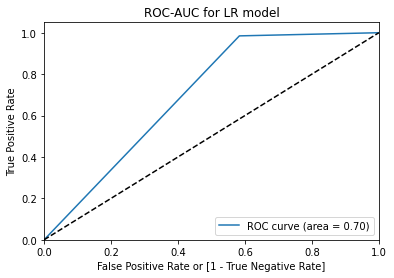

(array([0.        , 0.58333333, 1.        ]),
 array([0.        , 0.98473282, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test,y_pred)

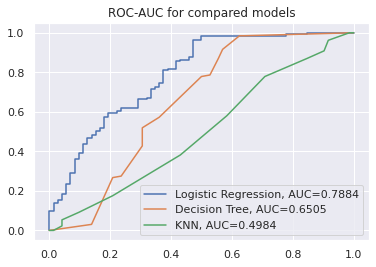

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = lr_gs
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit decision tree model and plot ROC curve
model = dt_gs
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit KNN model and plot ROC curve
model = knn_gs
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
plt.title('ROC-AUC for compared models')

#add legend
plt.legend()

In [ ]:
y_train_pred = dt_gs.predict(X_train)
y_pred = dt_gs.predict(X_test)

In [ ]:
print('Classification report: \n', classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.08      0.14        72
           1       0.66      0.96      0.78       131

    accuracy                           0.65       203
   macro avg       0.60      0.52      0.46       203
weighted avg       0.62      0.65      0.55       203



In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC for DecisionTree model')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

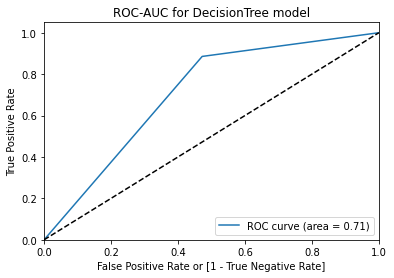

(array([0.        , 0.47222222, 1.        ]),
 array([0.        , 0.88549618, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(y_test,y_pred)